# A visual introduction to machine learning

In machine learning, computers apply statistical learning techniques to automatically identify patterns in data. These techniques can be used to make highly accurate predictions.
Let’s say you had to determine whether a home is in San Francisco or in New York. In machine learning terms, categorizing data points is a classification task.

Since San Francisco is relatively hilly, the elevation of a home may be a good way to distinguish the two cities.

Based on the home-elevation data to the right, you could argue that a home above 73 meters should be classified as one in San Francisco.
Keep scrolling. Using a data set about homes, we will create a machine learning model to distinguish homes in New York from homes in San Francisco.

In [3]:
import pandas as pd
import numpy as np

In [13]:
df = pd.read_csv("/Users/adilkhan/Documents/CS Fall 16/RA Work/part_1_data.csv")

In [21]:
df

,in_sf,beds,bath,price,year_built,sqft,price_per_sqft,elevation
0,0,2.0,1.0,999000,1960,1000,999,10
1,0,2.0,2.0,2750000,2006,1418,1939,0
2,0,2.0,2.0,1350000,1900,2150,628,9
3,0,1.0,1.0,629000,1903,500,1258,9
4,0,0.0,1.0,439000,1930,500,878,10
5,0,0.0,1.0,439000,1930,500,878,10
6,0,1.0,1.0,475000,1920,500,950,10
7,0,1.0,1.0,975000,1930,900,1083,10
8,0,1.0,1.0,975000,1930,900,1083,12
9,0,2.0,1.0,1895000,1921,1000,1895,12


# First, some intuition


Let’s say you had to determine whether a home is in San Francisco or in New York. In machine learning terms, categorizing data points is a classification task.

Since San Francisco is relatively hilly, the elevation of a home may be a good way to distinguish the two cities.

Based on the home-elevation data to the right, you could argue that a home above 73 meters should be classified as one in San Francisco.

In [15]:
hsf = len(df[df['elevation'] > 73])
hny = len(df[df['elevation'] <= 73])

In [16]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, LabelSet
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from bokeh.transform import factor_cmap
from bokeh.palettes import Spectral6

fruits = ['Homes in San Francisco', 'Homes in New York']
counts = [hsf, hny]

source = ColumnDataSource(data=dict(fruits=fruits, counts=counts))

output_notebook()
p = figure(x_range=fruits, plot_height=400, plot_width = 300, toolbar_location=None, title="Counts")
p.vbar(x='fruits', top='counts', width=0.5, source=source, legend="fruits",
       line_color='white',fill_color=factor_cmap('fruits', palette=Spectral6, factors=fruits))

labels = LabelSet(x='fruits', y='counts', text='counts', level='glyph',
        x_offset=-15, y_offset=0, source=source, render_mode='canvas')
p.add_layout(labels)      
       
show(p)

Loading BokehJS ...

# Adding nuance

Adding another dimension allows for more nuance. For example, New York apartments can be extremely expensive per square foot.

So visualizing elevation and price per square foot in a scatterplot helps us distinguish lower-elevation homes.

The data suggests that, among homes at or below 73 meters, those that cost more than $19,116.7 per square meter are in New York City.

Dimensions in a data set are called features, predictors, or variables.

In [17]:
from bokeh.plotting import figure, output_file, show

# output to static HTML file
output_notebook()

p = figure(plot_width=800, plot_height=800)

dfwithelevationlowerthan73 = df[df['elevation'] < 73]
dfwithelevationgreaterthan73 = df[df['elevation'] >= 73]
#df1 = df[df['price_per_sqft'] > 1776 & (df['elevation'] < 73)]
df1 = dfwithelevationlowerthan73[dfwithelevationlowerthan73['price_per_sqft'] > 1776]

# add a square renderer with a size, color, and alpha
p.square(df['price_per_sqft'], df['elevation'], size=10, color="green", alpha=0.5)
p.circle(df1['price_per_sqft'], df1['elevation'], size=10, color="blue", alpha=0.5)

# show the results
show(p)

Loading BokehJS ...

# Drawing boundaries

You can visualize your elevation (>73 m) and price per square foot (>$19,116.7) observations as the boundaries of regions in your scatterplot. Homes plotted in the green and blue regions would be in San Francisco and New York, respectively.

Identifying boundaries in data using math is the essence of statistical learning.

Of course, you’ll need additional information to distinguish homes with lower elevations and lower per-square-foot prices.

In [18]:
from bokeh.plotting import figure, output_file, show

# output to static HTML file
output_notebook()

p = figure(plot_width=800, plot_height=800)

dfwithelevationlowerthan73 = df[df['elevation'] < 73]
dfwithelevationgreaterthan73 = df[df['elevation'] >= 73]
#df1 = df[df['price_per_sqft'] > 1776 & (df['elevation'] < 73)]
df1 = dfwithelevationlowerthan73[dfwithelevationlowerthan73['price_per_sqft'] > 1776]

# add a square renderer with a size, color, and alpha
p.square(df['price_per_sqft'], df['elevation'], size=10, color="green", alpha=0.5)
p.circle(df1['price_per_sqft'], df1['elevation'], size=10, color="blue", alpha=0.5)
p.quad(top=[250], bottom=[73], left=[250],
       right=[5000], color="#B3DE69",alpha=0.5)
p.quad(top=[73], bottom=[0], left=[1776],
       right=[5000], color="blue",alpha=0.5)

# show the results
show(p)

Loading BokehJS ...

The dataset we are using to create the model has 7 different dimensions. Creating a model is also known as training a model.

On the right, we are visualizing the variables in a scatterplot matrix to show the relationships between each pair of dimensions.

There are clearly patterns in the data, but the boundaries for delineating them are not obvious.

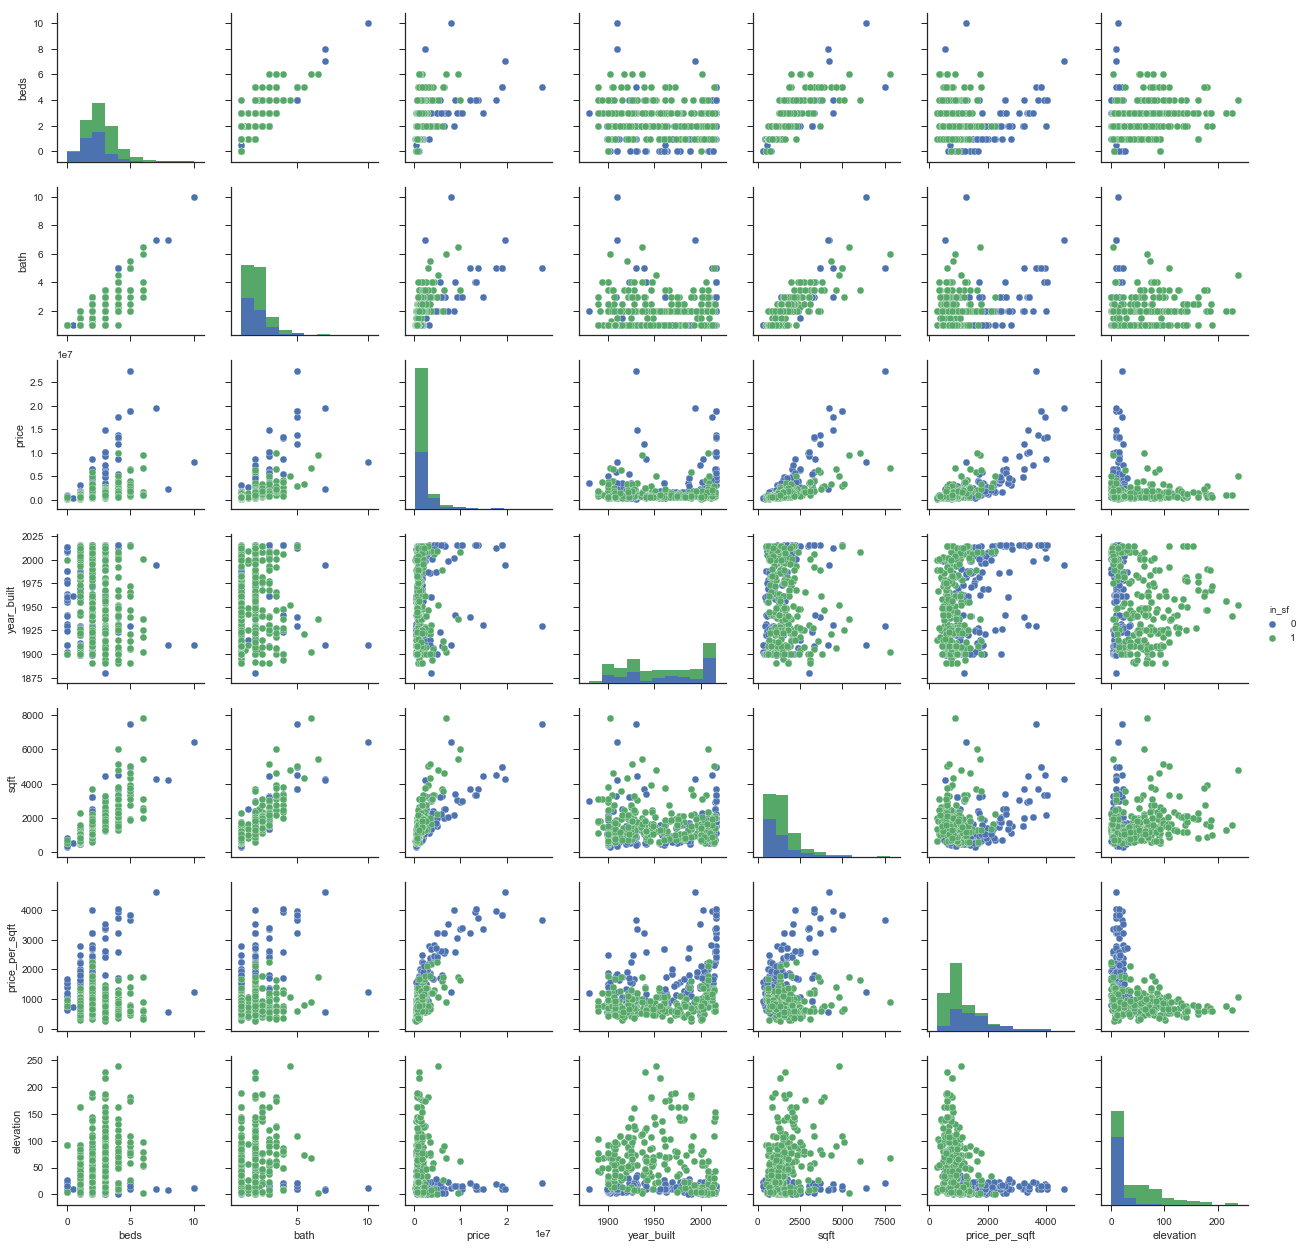

In [22]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df,hue="in_sf",vars=["beds","bath","price","year_built","sqft","price_per_sqft","elevation"])
import matplotlib.pyplot as plt
plt.show()

# And now, machine learning

Finding patterns in data is where machine learning comes in. Machine learning methods use statistical learning to identify boundaries.

One example of a machine learning method is a decision tree. Decision trees look at one variable at a time and are a reasonably accessible (though rudimentary) machine learning method.

# Finding better boundaries

Let's revisit the 73-m elevation boundary proposed previously to see how we can improve upon our intuition.

Clearly, this requires a different perspective.

By transforming our visualization into a histogram, we can better see how frequently homes appear at each elevation.

While the highest home in New York is 73m, the majority of them seem to have far lower elevations.



In [23]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, LabelSet
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from bokeh.transform import factor_cmap
from bokeh.palettes import Spectral6

fruits = df['elevation']
counts = df['elevation']

source = ColumnDataSource(data=dict(fruits=fruits, counts=counts))

output_notebook()
p = figure(x_range=fruits, plot_height=400, plot_width = 300, toolbar_location=None, title="Counts")
p.vbar(x='fruits', top='counts', width=0.5, source=source, legend="fruits",
       line_color='white',fill_color=factor_cmap('fruits', palette=Spectral6, factors=fruits))

labels = LabelSet(x='fruits', y='counts', text='counts', level='glyph',
        x_offset=-15, y_offset=0, source=source, render_mode='canvas')
p.add_layout(labels)      
       
show(p)

Loading BokehJS ...

ValueError: Unrecognized range input: '0       10
1        0
2        9
3        9
4       10
5       10
6       10
7       10
8       12
9       12
10       4
11       5
12       5
13       3
14       5
15       5
16      10
17       3
18       2
19       5
20       9
21      10
22      10
23       4
24       5
25       6
26      10
27      10
28      10
29       8
      ... 
462    136
463    143
464    143
465    153
466     35
467     36
468     76
469     11
470     64
471     79
472     84
473     90
474      1
475      1
476      2
477      2
478      2
479     13
480      4
481      4
482      5
483     24
484     48
485     49
486     66
487     76
488    106
489    106
490    163
491    216
Name: elevation, Length: 492, dtype: int64'

# Your first fork

A decision tree uses if-then statements to define patterns in data.

For example, if a home's elevation is above some number, then the home is probably in San Francisco.

In machine learning, these statements are called forks, and they split the data into two branches based on some value.

That value between the branches is called a split point. Homes to the left of that point get categorized in one way, while those to the right are categorized in another. A split point is the decision tree's version of a boundary.

